# Explore here

Paso 1: Carga del conjunto de datos

https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv

En este caso solo nos interesan las columnas Latitude, Longitude y MedInc

Dividir convenientemente el conjunto de datos en train y test

In [1]:
import pandas as pd
df_california_housing = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_california_housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [2]:
df_california_housing = df_california_housing[['MedInc','Latitude','Longitude']] #dato para construir un dataframe con las columnas que necesito, si son pocas
df_california_housing.head(3)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24


In [3]:
from sklearn.model_selection import train_test_split
#solo se divide entre x's de entrenamiento y x's de test, la formula no necesita la existencia de la variable dependiente 'y'
X_train, X_test = train_test_split(df_california_housing, test_size = 0.2, random_state = 42)

X_train.head(3)

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48


Paso 2: Construye un K-Means
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

In [4]:
from sklearn.cluster import KMeans

modelo_no_supervisado = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
modelo_no_supervisado.fit(X_train)

X_train['Cluster'] = modelo_no_supervisado.fit_predict(X_train)
X_train.head(3)

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1


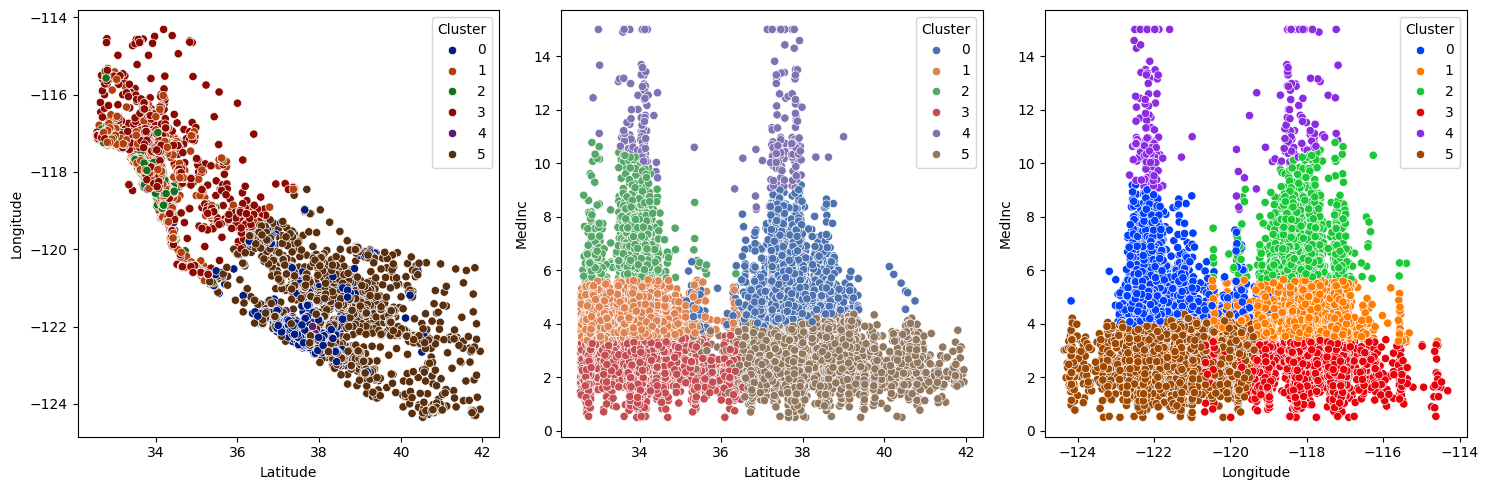

In [5]:
#graficar resultados en un grafico con puntos

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "dark")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "bright")
plt.tight_layout()

plt.show()

#Seaborn in fact has six variations of matplotlib’s palette, called: deep, muted, pastel, bright, dark, and colorblind.

Paso 3: Predice con el conjunto de test
Ahora utiliza el modelo entrenado con el conjunto test y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria o no

In [6]:
X_test['Cluster'] = modelo_no_supervisado.predict(X_test)
X_test.head(3)

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5


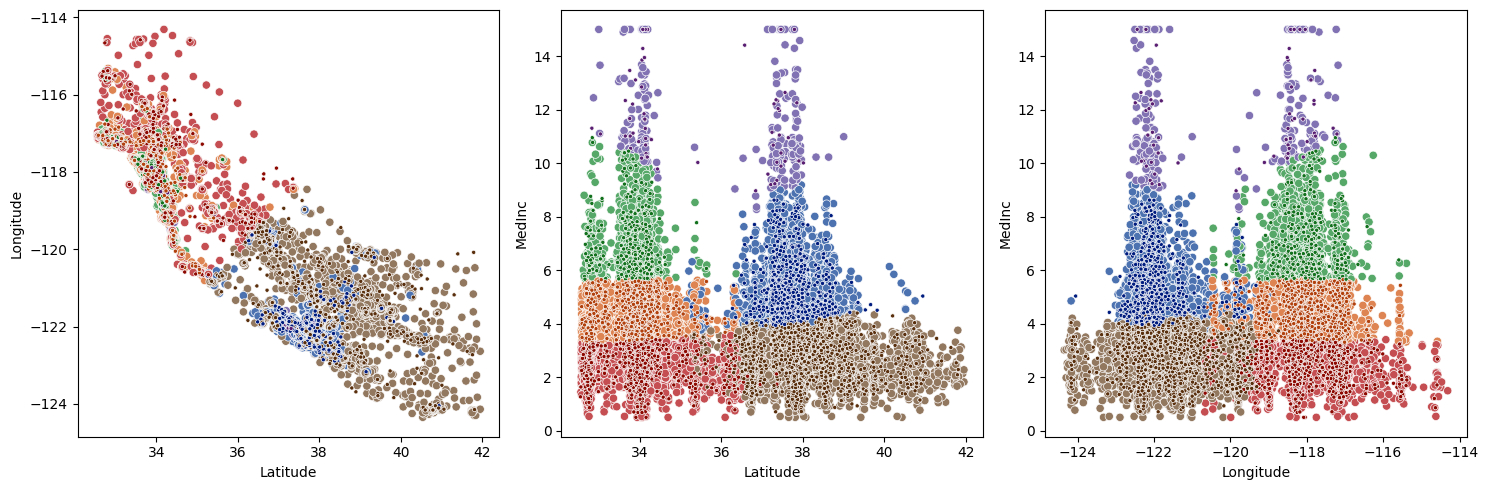

In [7]:
#Graficamos
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "dark", marker = ".")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "dark", marker = ".")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "dark", marker = ".")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Conclusión: Podemos observar que los x de test predichos se encuentran dentro de los clusters de entrenamiento, por lo tanto el modelo puede predecir con bastante precisión el cluster con un modelo de k-means no supervisado

Paso 4: Entrena un modelo de clasificación supervisada

Este flujo es muy común cuando contamos con datos no etiquetados: utilizar un modelo de aprendizaje no supervisado para etiquetarlos de forma automática y a continuación, un modelo de aprendizaje supervisado.

In [8]:
# Es un problema de clasificación, por lo tanto los modelos que debemos immportar son los 'classifier' en lugar de los de regresión
# Debemos definir una variable objetivo, en este caso los x de entrenamiento predicen los cluster del conjunto x de test 

In [9]:
y_train = X_train['Cluster']
y_test = X_test['Cluster']
X_train.drop('Cluster', axis=1,inplace=True)
X_test.drop('Cluster',axis=1,inplace=True)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#definir modelo
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
#ajustar modelo
model_tree.fit(X_train,y_train)
model_rf.fit(X_train,y_train)
#predecir
y_pred_tree = model_tree.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

print(f'EL error del arból en predecir clusters es {accuracy_score(y_pred_tree,y_test)}')
print(f'El error del random forest en predecir cluster es de {accuracy_score(y_pred_rf,y_test)}')

EL error del arból en predecir clusters es 0.9951550387596899
El error del random forest en predecir cluster es de 0.9963662790697675


El modelo de random forest tiene menor error de predicción porque hace una evaluacion de árboles 

In [12]:
from pickle import dump

dump(modelo_no_supervisado,open('../models/k-means_6_42.sav','wb'))
dump(model_tree,open('../models/dt_42.sav','wb'))
dump(model_rf,open('../models/rf_42.sav','wb'))